<img src='../_images/py-hdr.png' />

In [1]:
import warnings

In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
sns.set()

In [81]:
def ecdf(data):
    """ Function to calculate the x,y values to plot the Empirical Cummulative Distribution Function """
    length = len(data)
    
    y = np.arange(1, length + 1) / length
    x = np.sort(data)
    
    return x, y   

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/anedesquerra/datasets/master/ppls/boston.csv')

In [21]:
df.shape

(506, 14)

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [86]:
x, y = ecdf(df['CRIM'])

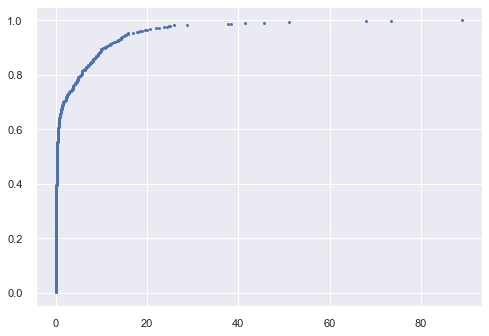

In [89]:
plt.plot(x, y, marker='.', linestyle='none')

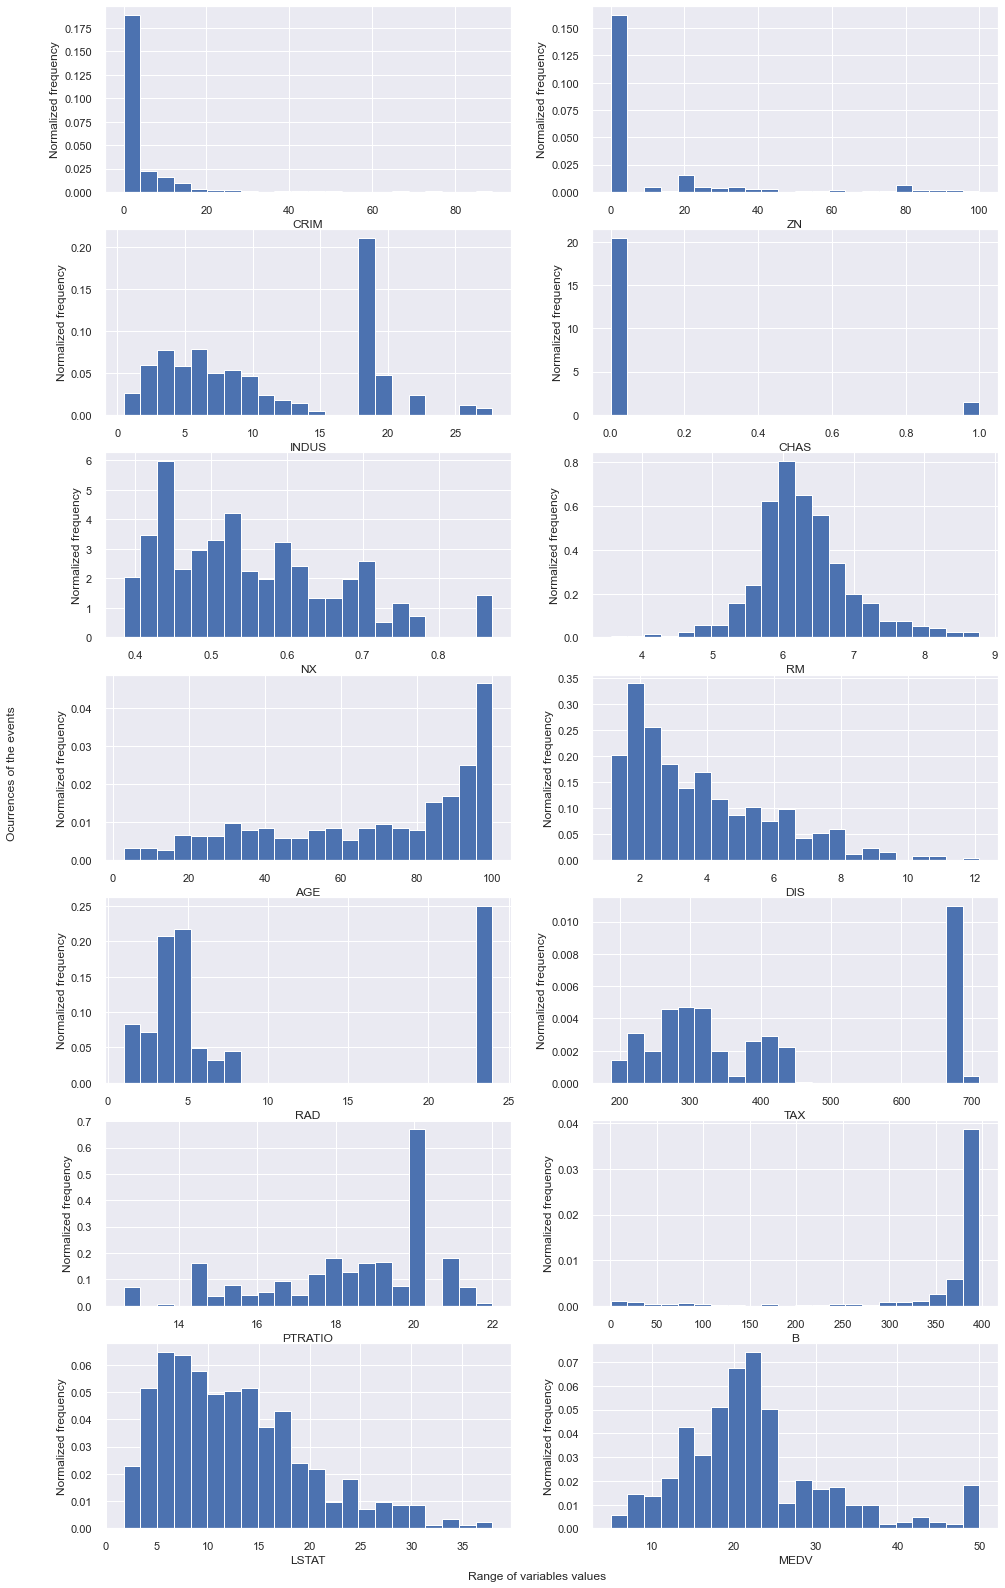

In [79]:
subplots = len(df.columns)
if subplots % 2 != 0:
    subplots += 1  
    
fig, axes = plt.subplots(int(subplots / 2), 2, sharex=False, sharey=False, 
                         figsize=(16, 4 * int(subplots / 2)))
coords = (((item // 2,  item % 2) for item in range(len(df.columns))))

for col in range(int(subplots)):
    x, y = next(coords)
    _ = df[df.columns[col]].plot(kind='hist', density=True,
                                 bins=int(np.sqrt(len(df['ZN']))), ax=axes[x, y])
    axes[x, y].set(xlabel=df.columns[col], ylabel='Normalized frequency')
    
_ = fig.text(0.5, 0.1, 'Range of variables values', ha='center')
_ = fig.text(0.04, 0.5, 'Ocurrences of the events', va='center', rotation='vertical')

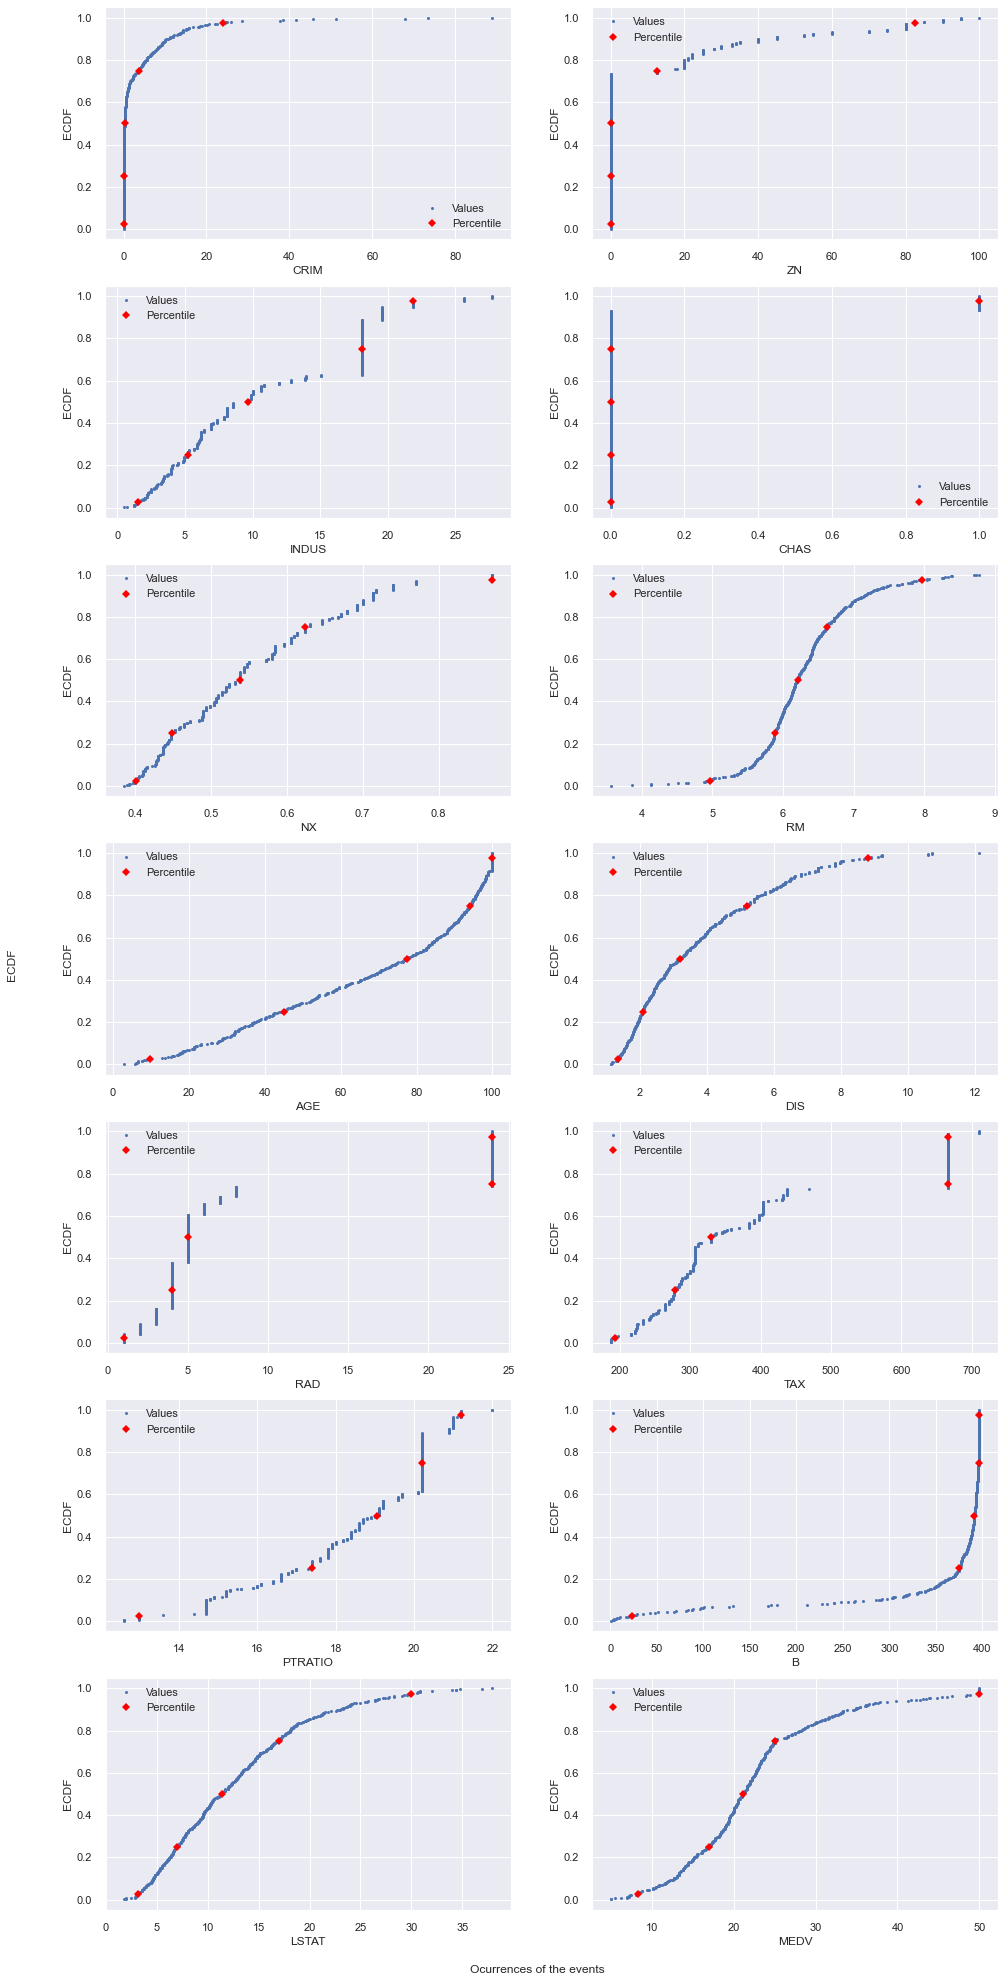

In [109]:
subplots = len(df.columns)
if subplots % 2 != 0:
    subplots += 1  
    
fig, axes = plt.subplots(int(subplots / 2), 2, sharex=False, sharey=False, 
                         figsize=(16, 5 * int(subplots / 2)))
coords = (((item // 2,  item % 2) for item in range(len(df.columns))))

for col in range(int(subplots)):
    x, y = next(coords)       
    

    x_val, y_val = ecdf(df[df.columns[col]])
    percentiles = np.percentile(x_val, np.array([2.5, 25, 50, 75, 97.5]))
    
    axes[x, y].plot(x_val, y_val, marker='.', linestyle='none', label='Values')
    axes[x, y].plot(percentiles, np.array([2.5, 25, 50, 75, 97.5]) / 100, 
                    marker='D', linestyle='none', color='red', label='Percentiles')
    axes[x, y].legend()  
    axes[x, y].set(xlabel=df.columns[col], ylabel='ECDF')
    
_ = fig.text(0.5, 0.1, 'Ocurrences of the events', ha='center')
_ = fig.text(0.04, 0.5, 'ECDF', va='center', rotation='vertical')
